In [2]:
pip install scikit-learn

In [ ]:
#Importation des librairies et des données

In [3]:
import pandas as pd
import numpy as np
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving Accident2016_.xlsx to Accident2016_.xlsx


In [ ]:
#chargement les données

In [9]:
data = pd.read_excel('Accident2016_.xlsx')

In [ ]:
#Séparer les variables indépendantes (X) et la variable cible (y)

In [10]:
X = data[['COD_PAY_ORI', 'AGE_CON', 'NUM_ACC', 'COD_TYP_VEH', 'COD_USA_VEH', 'ANN_MIS_SCE', 'SEX_CON', 'COD_NAT_CON', 'COD_PRF_CON', 'COD_CAT_PER', 'ANN_DEL_PER', 'LIE_DEL_PER', 'VAL_PER', 'COD_TRA', 'COD_TUE', 'COD_BLE', 'COD_FAU_CON', 'COD_FAC_PHY', 'COD_FAU_NON_CON']]
y = data['mortelle ou non']

In [ ]:
# Diviser les données en ensembles d'entraînement et de test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Créer un modèle de régression logistique

In [12]:
model = LogisticRegression()

In [ ]:
# Entraîner le modèle sur l'ensemble d'entraînement

In [34]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Faire des prédictions sur l'ensemble de test

In [14]:
y_pred = model.predict(X_test)

In [ ]:
# Calculer l'exactitude des prédictions

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

Précision du modèle : 0.7065548780487805


In [16]:
# Obtenir les coefficients du modèle
coefficients = model.coef_

# Associer les noms des variables indépendantes avec les coefficients correspondants
variable_coefficients = zip(X.columns, coefficients[0])

# Afficher les coefficients
for variable, coefficient in variable_coefficients:
    print(f"Variable : {variable}, Coefficient : {coefficient}")

Variable : COD_PAY_ORI, Coefficient : 0.0006778704681233901
Variable : AGE_CON, Coefficient : -0.01523641377059124
Variable : NUM_ACC, Coefficient : -5.808981686427084e-05
Variable : COD_TYP_VEH, Coefficient : -0.003796607029961512
Variable : COD_USA_VEH, Coefficient : -0.09442823539950676
Variable : ANN_MIS_SCE, Coefficient : 0.004245439157318124
Variable : SEX_CON, Coefficient : -0.009253409545665734
Variable : COD_NAT_CON, Coefficient : 0.0006778704681233901
Variable : COD_PRF_CON, Coefficient : 0.06325722767459388
Variable : COD_CAT_PER, Coefficient : 0.10892982308377366
Variable : ANN_DEL_PER, Coefficient : -0.0034392247763149683
Variable : LIE_DEL_PER, Coefficient : 0.017749923010908452
Variable : VAL_PER, Coefficient : -0.002739362960426558
Variable : COD_TRA, Coefficient : 0.022839975697041874
Variable : COD_TUE, Coefficient : 0.3357802210784587
Variable : COD_BLE, Coefficient : 0.08815355035328495
Variable : COD_FAU_CON, Coefficient : 0.08091791459371184
Variable : COD_FAC_PHY

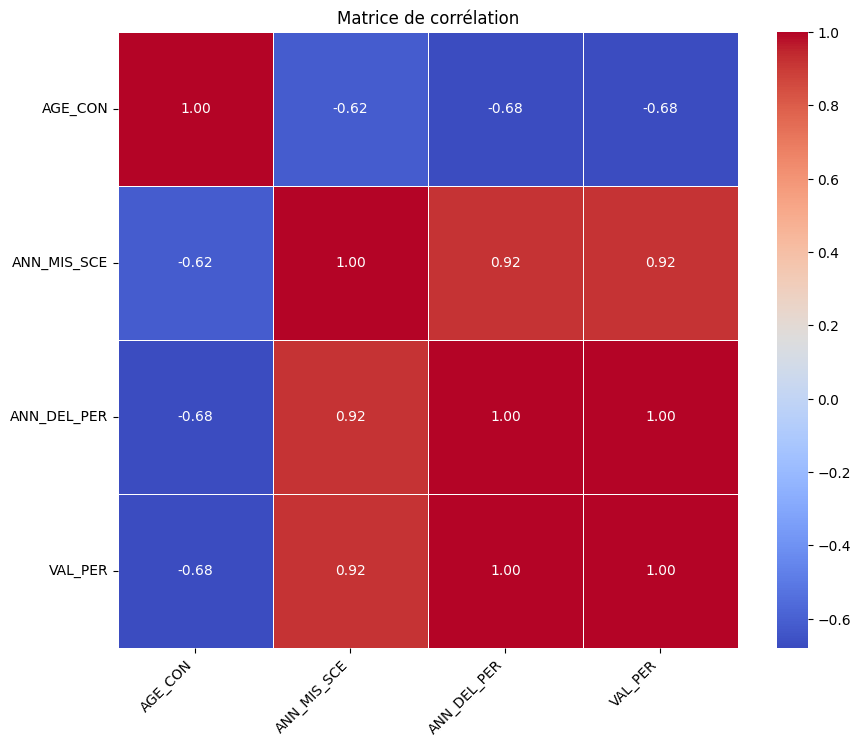

In [18]:
matrice_correlation = data[colonnes_numeriques].corr()

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Créer un heatmap de la matrice de corrélation
heatmap = sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)

# Personnaliser les étiquettes des axes x et y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Ajouter un titre au graphique
ax.set_title("Matrice de corrélation")

# Afficher le graphique
plt.show()

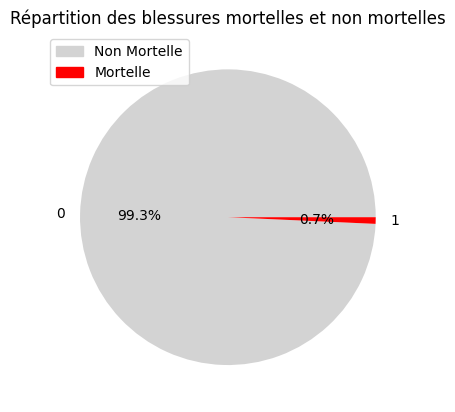

In [19]:
counts = data['mortelle ou non'].value_counts()
labels = counts.index
colors = ['lightgray', 'red']  # Définis ici les couleurs pour chaque catégorie (non mortelle, mortelle)

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Répartition des blessures mortelles et non mortelles')

# Ajout de la légende avec les explications des couleurs
legend_labels = ['Non Mortelle', 'Mortelle']
legend_colors = ['lightgray', 'red']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(legend_handles, legend_labels)

plt.show()

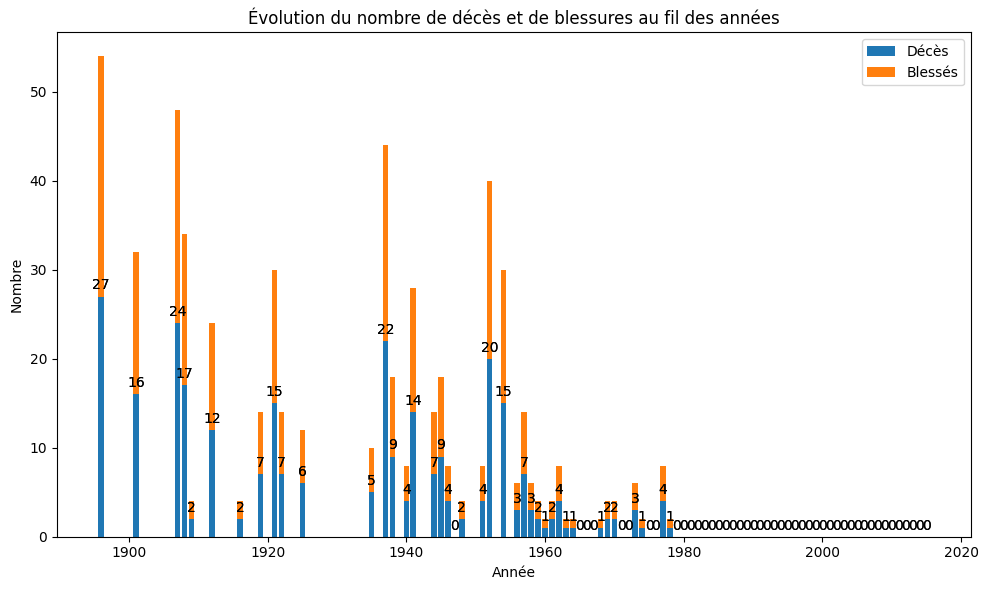

In [20]:
# Récupérer les années uniques
years = data['ANN_MIS_SCE'].unique()

# Calculer le nombre total de décès et de blessures par année
deceased = data.groupby('ANN_MIS_SCE')['Total_Deceased'].sum()
injured = data.groupby('ANN_MIS_SCE')['Total_Injured'].sum()

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer un graphique en barres empilées
bar1 = ax.bar(years, deceased, label='Décès')
bar2 = ax.bar(years, injured, bottom=deceased, label='Blessés')

# Ajouter des étiquettes d'axe et un titre
ax.set_xlabel('Année')
ax.set_ylabel('Nombre')
ax.set_title('Évolution du nombre de décès et de blessures au fil des années')

# Ajouter une légende
ax.legend()

# Ajouter des annotations pour afficher les valeurs sur les barres
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Ajuster les marges pour éviter que les barres ne soient coupées
plt.tight_layout()

# Afficher le graphique
plt.show()

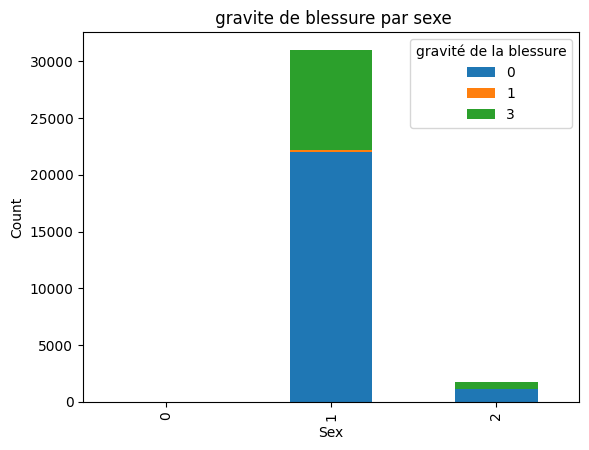

In [41]:
# Group the data by sex and severity, and count the occurrences
severity_counts = data.groupby(['SEX_CON', 'gravité de la blessure']).size().unstack()

# Plot the bar chart
severity_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title(' gravite de blessure par sexe')

# Show the chart
plt.show()

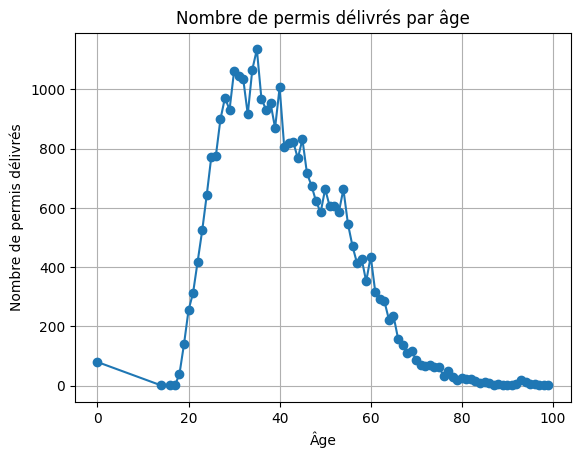

In [39]:
# Grouper les données par âge et compter le nombre de permis délivrés
permis_par_age = data.groupby('AGE_CON')['ANN_DEL_PER'].count().reset_index()

# Trier les données par âge croissant
permis_par_age = permis_par_age.sort_values('AGE_CON')

# Créer le graphique
plt.plot(permis_par_age['AGE_CON'], permis_par_age['ANN_DEL_PER'], marker='o')
plt.xlabel('Âge')
plt.ylabel('Nombre de permis délivrés')
plt.title('Nombre de permis délivrés par âge')
plt.grid(True)

# Afficher le graphique
plt.show()